In [1]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def detect_blur(image_np):
    """
        detect_blur: detect the image contains
                blur or not

        Params:
            - image_np: Numpy array of the image

        return:
            - Blurness of the image
    """
    laplacian = cv2.Laplacian(image_np, cv2.CV_64F)
    variance = laplacian.var()
    return variance

In [2]:
import os


In [3]:
%pwd

'/mnt/c/Users/sv/source/Enhancement/Image-Enchancer/Experiments'

In [4]:
os.chdir("../Images")

In [5]:
img_path = "./blur_image_4.jpg"

img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
##img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

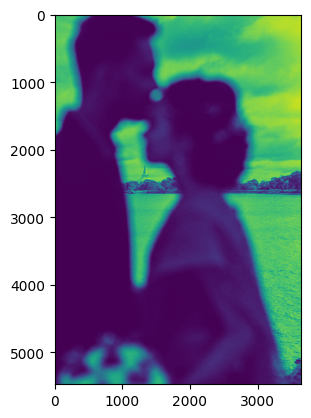

In [6]:
plt.imshow(img)

In [31]:
##img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [7]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

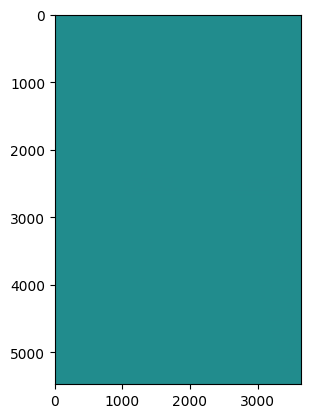

In [8]:
plt.imshow(laplacian)

In [9]:
laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
laplacian_var

43.323701234038346

In [10]:
import argparse
from imutils import paths

In [16]:
def detect_blur_and_bright_spot(image_path, threshold):
  
    image = cv2.imread(image_path)

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binary_image = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

   
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)


    _, max_val, _, _ = cv2.minMaxLoc(gray)
    binary_variance = binary_image.var()
    laplacian_variance = laplacian.var()

   
    blur_text = "Not Blurry"
    bright_spot_text = "No Bright Spot"

    if laplacian_variance < threshold:
        blur_text = "Blurry"

    
    if 5000 < binary_variance < 8500:
        bright_spot_text = "Bright Spot"


    image_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

    print(blur_text)
    print(bright_spot_text)

    plt.imshow(image_rgb)

Not Blurry
No Bright Spot


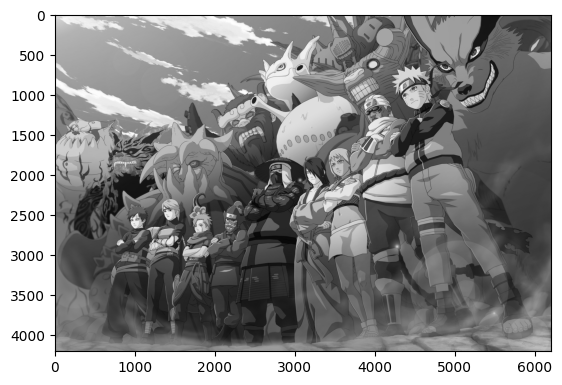

In [18]:
img_path = "./anime.jpg"
detect_blur_and_bright_spot(img_path,250.0)

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import shutil

def detect_blur(image_path, threshold):
    # Read the image
    image = cv2.imread(image_path)

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    laplacian = cv2.Laplacian(gray, cv2.CV_64F)


    laplacian_variance = laplacian.var()
    print(laplacian_variance)

    is_blurry = laplacian_variance < threshold

    return is_blurry, laplacian_variance


def analyze_dataset_blur(dataset_path, threshold, blurry_folder, non_blurry_folder):
    results = []

  
    if not os.path.exists(blurry_folder):
        os.makedirs(blurry_folder)
    if not os.path.exists(non_blurry_folder):
        os.makedirs(non_blurry_folder)


    for filename in os.listdir(dataset_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  
            image_path = os.path.join(dataset_path, filename)

           
            is_blurry, variance = detect_blur(image_path, threshold)

            if is_blurry:
                shutil.copy(image_path, os.path.join(blurry_folder, filename))
            else:
                shutil.copy(image_path, os.path.join(non_blurry_folder, filename))

            results.append({
                "image": filename,
                "is_blurry": is_blurry,
                "laplacian_variance": variance
            })

    return results



In [17]:

dataset_path = '../blurred_images'
blurry_folder = "./Blurry_folder"
non_blurry_folder = "./Non_Blurry_folder"
threshold = 250  
results = analyze_dataset_blur(dataset_path, threshold,blurry_folder,non_blurry_folder)


18.49066876863147
3.952856904941134
76.14818110819533
4.443297905924445
19.60812530672338
32.45957974907998
30.05181828019564
174.1576143683917
8.68171550842474
138.81168387421818
964.7629091288734
157.7783723748908
51.59284885237788
66.6619726029274
1473.5353824135864
21.623285548971225
298.53801241122756
97.77981328866348
91.28217004411933
103.76857514329052
90.08451437023322
258.12896819273953
194.04693537801955
11469.106345395914
12.958611861972788
41.916993483226506
35.07523720215454
26.53991634122533
4.150675014650297
63.092721867822874
7.548397132702602
305.3505710557488
220.13334931914795
106.92589321651593
9.688151749985968
292.66907811253304
321.3089465328225
43.28900150462924
137.65130724768827
170.44720095709386
301.1110843314414
17.040541884762227
46.258139668568454
5.120886151336776
44.71338968171785
124.26187462186878
64.84327400978955
223.86920343841743
55.61623595833067
95.63217724737345
53.48148736228879
17.43653833912334
181.84024305876846
61.08301448946388
162.58523

In [70]:
def analyze_results(results):
    total_images = len(results)
    blurry_images = sum(1 for result in results if result['is_blurry'])
    not_blurry_images = total_images - blurry_images

    print(f"Total Images: {total_images}")
    print(f"Blurry Images: {blurry_images} ({(blurry_images / total_images) * 100:.2f}%)")
    print(f"Not Blurry Images: {not_blurry_images} ({(not_blurry_images / total_images) * 100:.2f}%)")

    variances = [result['laplacian_variance'] for result in results]
    plt.hist(variances, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Laplacian Variance')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Number of Images')
    plt.show()

    blurry_examples = [result['image'] for result in results if result['is_blurry']]
    if blurry_examples:
        print(f"Examples of blurry images: {blurry_examples[:5]}")
    else:
        print("No blurry images detected.")



In [13]:
blurry_folder = "./Blurry_folder"
non_blurry_folder = "./Non_Blurry_folder"

def create_ground_truth(blurry_folder, non_blurry_folder):
    ground_truth = {}

    # Process blurry images
    for filename in os.listdir(blurry_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the extensions as needed
            ground_truth[filename] = True

    # Process non-blurry images
    for filename in os.listdir(non_blurry_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust the extensions as needed
            ground_truth[filename] = False

    return ground_truth

# Create ground truth
ground_truth = create_ground_truth(blurry_folder, non_blurry_folder)

# Print the ground truth to verify
print(ground_truth)

{'blur_image6.jpg': True, 'blur_image_3.jpg': True, 'blur_image_5.jpg': True, 'Gaussian_blur.jpg': True, 'image_1.jpg': True, 'image_10.jpg': True, 'image_11.jpg': True, 'image_12.jpg': True, 'image_13.jpg': True, 'image_14.jpg': True, 'image_16.jpg': True, 'image_17.jpg': True, 'image_18.jpg': True, 'image_2.jpg': True, 'image_21.jpg': True, 'image_22.jpg': True, 'image_23.jpg': True, 'image_24.jpg': True, 'image_26.jpg': True, 'image_28.jpg': True, 'image_29.jpg': True, 'image_3.jpg': True, 'image_30.jpg': True, 'image_31.jpg': True, 'image_32.jpg': True, 'image_33.jpg': True, 'image_35.jpg': True, 'image_36.jpg': True, 'image_37.jpg': True, 'image_4.jpg': True, 'image_40.jpg': True, 'image_41.jpg': True, 'image_43.jpg': True, 'image_44.jpg': True, 'image_45.jpg': True, 'image_46.jpg': True, 'image_47.jpg': True, 'image_48.jpg': True, 'image_49.jpg': True, 'image_50.jpg': True, 'image_51.jpg': True, 'image_52.jpg': True, 'image_53.jpg': True, 'image_54.jpg': True, 'image_55.jpg': Tru

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def analyze_results(results):   
    total_images = len(results)
    blurry_images = sum(1 for result in results if result['is_blurry'])
    not_blurry_images = total_images - blurry_images

    print(f"Total Images: {total_images}")
    print(f"Blurry Images: {blurry_images} ({(blurry_images / total_images) * 100:.2f}%)")
    print(f"Not Blurry Images: {not_blurry_images} ({(not_blurry_images / total_images) * 100:.2f}%)")
    y_true = []
    y_pred = []
    
    for result in results:
        image_name = result['image']
        if image_name in ground_truth:
            y_true.append(ground_truth[image_name])
            y_pred.append(result['is_blurry'])
    
    # Debugging: print out y_true and y_pred
    print(f"y_true: {y_true}")
    print(f"y_pred: {y_pred}")
    
    if len(y_true) == 0 or len(y_pred) == 0:
        print("Error: y_true or y_pred is empty, check your ground_truth and results.")
        return
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Visualize the confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Not Blurry', 'Predicted Blurry'],
                yticklabels=['Actual Not Blurry', 'Actual Blurry'])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Calculate Sensitivity and Specificity
    true_blurry = cm[1, 1]
    false_blurry = cm[0, 1]
    true_non_blurry = cm[0, 0]
    false_non_blurry = cm[1, 0]

    sensitivity = true_blurry / (true_blurry + false_non_blurry) if (true_blurry + false_non_blurry) > 0 else 0
    specificity = true_non_blurry / (true_non_blurry + false_blurry) if (true_non_blurry + false_blurry) > 0 else 0

    print(f"Sensitivity: {sensitivity:.3f}")
    print(f"Specificity: {specificity:.3f}")

    # Optional: plot the results as a histogram of variances
    variances = [result['laplacian_variance'] for result in results]
    plt.hist(variances, bins=20, color='blue', edgecolor='black')
    plt.title('Distribution of Laplacian Variance')
    plt.xlabel('Laplacian Variance')
    plt.ylabel('Number of Images')
    plt.show()


y_true: [True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False]
y_pred: [True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, T

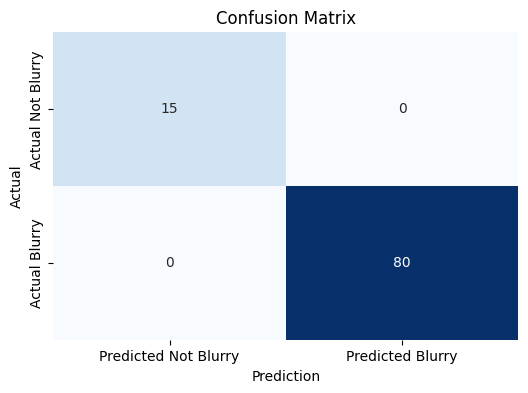

Sensitivity: 1.000
Specificity: 1.000


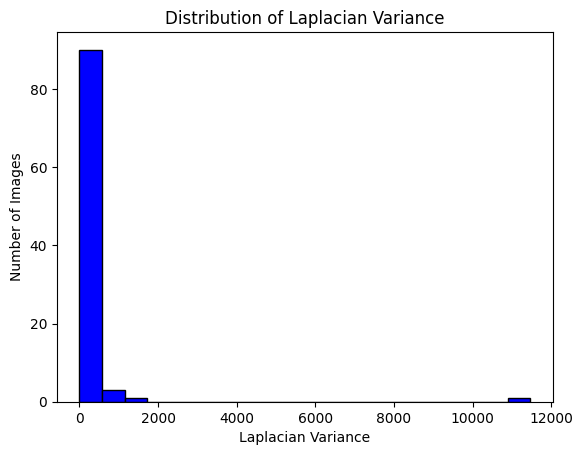

In [18]:
analyze_results(results)